In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from defectlib import maybe_pickle

In [3]:
maybe_pickle('./defect_tensors_D10/')

100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


In [4]:
defect_dict = load_tensors_all('./defect_tensors_D10/U2501/', width=128)

(91, 148, 53)
(52, 148, 53)
(89, 80, 170)
(90, 80, 170)


In [5]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 322
number of class 0: 180
	number of SN: 10
number of class 10: 142
	number of SN: 6


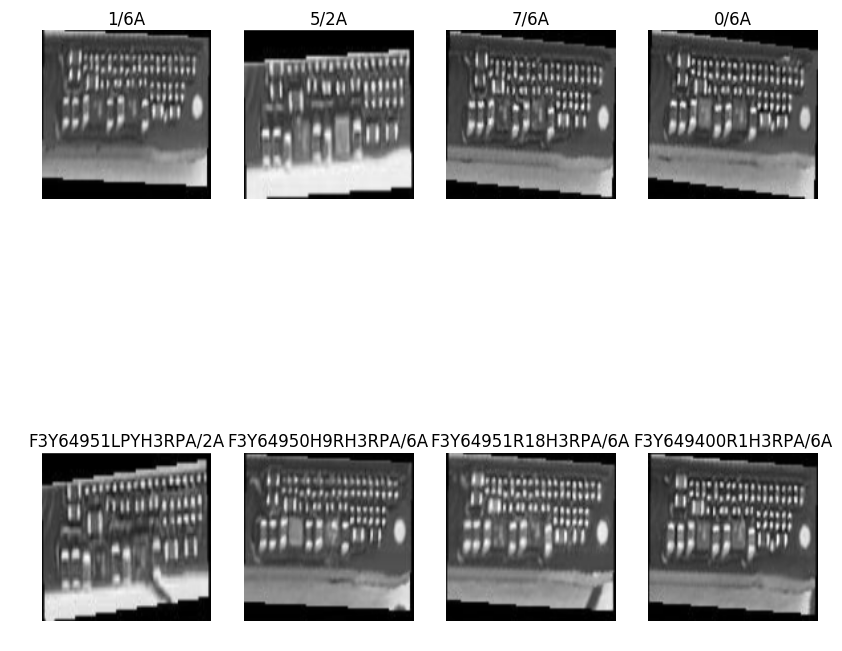

In [8]:
display_tensor(tensors, labels, sns)

In [9]:
from defectlib import GroupKFold_modeling

In [10]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=11, nb_epoch=10, input_shape=(128, 128))

Model 1
the label of validation image: 10
the s/n of validation image: F3Y64950H9RH3RPA
Train on 291 samples, validate on 31 samples
Epoch 1/10
291/291 [==============================] - 5s - loss: 1.3646 - acc: 0.5223 - val_loss: 1.3867 - val_acc: 0.0000e+00
Epoch 2/10
291/291 [==============================] - 4s - loss: 0.8601 - acc: 0.6048 - val_loss: 1.2269 - val_acc: 0.0000e+00
Epoch 3/10
291/291 [==============================] - 4s - loss: 0.5875 - acc: 0.7285 - val_loss: 0.0848 - val_acc: 1.0000
Epoch 4/10
291/291 [==============================] - 4s - loss: 0.4580 - acc: 0.8144 - val_loss: 0.4582 - val_acc: 0.6452
Epoch 5/10
291/291 [==============================] - 4s - loss: 0.3134 - acc: 0.8729 - val_loss: 0.2682 - val_acc: 1.0000
Epoch 6/10
291/291 [==============================] - 5s - loss: 0.2057 - acc: 0.9313 - val_loss: 0.0250 - val_acc: 1.0000
Epoch 7/10
291/291 [==============================] - 4s - loss: 0.1731 - acc: 0.9485 - val_loss: 0.4178 - val_acc: 0.677

In [13]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '0', 0.95833333333333337, 0.9583333333333334),
 (0, '7', 1.0, 1.0),
 (0, '9', 0.95238095238095233, 0.9523809523809523),
 (0, '2', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '1', 0.35294117647058826, 0.35294117647058826),
 (0, '6', 0.91666666666666663, 0.9166666666666666),
 (0, '8', 1.0, 1.0),
 (10, 'F3Y64950H9RH3RPA', 1.0, 0.0),
 (10, 'F3Y64950SRGH3RPA', 0.89655172413793105, 0.10344827586206896),
 (10, 'F3Y64951LPYH3RPA', 1.0, 0.0),
 (10, 'F3Y649400R1H3RPA', 0.92592592592592593, 0.07407407407407407),
 (10, 'F3Y64951R18H3RPA', 1.0, 0.0),
 (10, 'F3Y64950VDFGY4RA', 0.0, 1.0)]

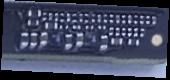

In [21]:
Image('./defect_tensors_D10/U2501/6A/U2501_6A_c0/U2501_Recombination_7_6A_0.jpg')

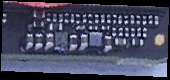

In [19]:
Image('./defect_tensors_D10/U2501/6A/U2501_6A_c10/F3Y64950VDFGY4RA 6AAAAAA_62.jpg')

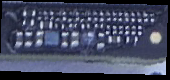

In [15]:
Image('./defect_tensors_D10/U2501/6A/U2501_6A_c10/F3Y64950H9RH3RPA 6AAAAAA_62.jpg')

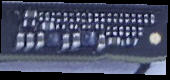

In [16]:
Image('./defect_tensors_D10/U2501/6A/U2501_6A_c10/F3Y64950SRGH3RPA 6AAAAAA_62.jpg')

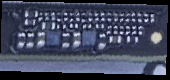

In [17]:
Image('./defect_tensors_D10/U2501/6A/U2501_6A_c10/F3Y64951LPYH3RPA 6AAAAAA_62.jpg')

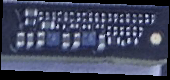

In [18]:
Image('./defect_tensors_D10/U2501/6A/U2501_6A_c10/F3Y649400R1H3RPA 6AAAAAA_62.jpg')